In [1]:
#Import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the Dataset
df = pd.read_csv('C:/Users/SilentMuzinde/Downloads/Fundo/Alfred/Combined_BankDataset.csv')
df.head()

,bank,period,totalassets,totalcapital,averagedeposit,marketshareofassets,marketshareofcapital,marketshareofdeposits,cashtototalassets,netLoanstototalassets,...,nplstogrossloans,roa,roe,netprofit,cpi,gdp,unemployment,hhi,camelrating,condition
0,AGRIBANK,18-Sep,3.093501e+08,7.563458e+07,4.680948e+05,2.280417,4.431372,1.433707,1.721480,44.297284,...,9.864326,2.698161,11.035648,8346765.27,101.97,3.4,4.9,5.200302,3,Satisfactory
1,BANC ABC,18-Sep,6.365096e+08,8.906593e+07,1.128461e+06,4.692119,5.218305,3.456313,0.230943,31.332934,...,15.342711,1.515153,8.031272,9644091.96,101.97,3.4,4.9,22.015979,3,Satisfactory
2,BARCLAYS,18-Sep,7.339746e+08,1.102969e+08,4.057135e+03,5.410595,6.462209,5.683631,2.294779,21.811533,...,1.371014,2.970150,18.626708,21800146.00,101.97,3.4,4.9,29.274543,2,Strong
3,CBZ,18-Sep,2.227140e+09,1.703429e+08,1.181483e+04,16.417672,9.980263,16.551372,1.910058,17.460500,...,15.709456,2.411202,27.448814,53700838.05,101.97,3.4,4.9,269.539943,2,Strong
4,ECOBANK,18-Sep,9.597976e+08,1.042552e+08,1.625423e+05,7.075281,6.108233,7.276989,0.591300,17.018111,...,2.394323,3.895216,28.190063,37386192.09,101.97,3.4,4.9,50.059600,3,Strong


In [3]:
#Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bank                                   411 non-null    object 
 1   period                                 411 non-null    object 
 2   totalassets                            411 non-null    float64
 3   totalcapital                           411 non-null    float64
 4   averagedeposit                         411 non-null    float64
 5   marketshareofassets                    411 non-null    float64
 6   marketshareofcapital                   411 non-null    float64
 7   marketshareofdeposits                  411 non-null    float64
 8   cashtototalassets                      411 non-null    float64
 9   netLoanstototalassets                  411 non-null    float64
 10  liquidassetstototalassets              411 non-null    float64
 11  liquid

In [4]:
#All Numberic Columns
numCols = df.select_dtypes(include=['number']).columns=='number'

#All Object Columns
objCols= (df.select_dtypes(include=['object'])).columns=='object'
print('Number of Numberic Columns: ', len(numCols))
print('Object Columns:',len(objCols))

Number of Numberic Columns:  26
Object Columns: 3


In [5]:
#summary of Numberic Columns by Bank
num = df.groupby('bank').mean(numeric_only=True)
num.head()

,totalassets,totalcapital,averagedeposit,marketshareofassets,marketshareofcapital,marketshareofdeposits,cashtototalassets,netLoanstototalassets,liquidassetstototalassets,liquidassetstodemanddeposits,...,rwatototalassets,nplstogrossloans,roa,roe,netprofit,cpi,gdp,unemployment,hhi,camelrating
bank,,,,,,,,,,,,,,,,,,,,,
ABC BANK,5.630968e+08,4.672417e+07,1.152800e+06,9.977113,6.544289,10.238920,2.016769,53.819273,23.635436,95.953181,...,65.852709,6.006600,0.836201,7.433194,3.608166e+06,109.000000,9.933333,5.533333,101.855460,3.000000
AFRASIA,1.122737e+08,1.554781e+07,1.435235e+03,1.674545,1.913864,1.776293,2.249818,52.401899,9.706927,90.810500,...,101.609020,26.206872,-1.658355,-8.166129,-1.269654e+06,110.000000,2.270000,5.500000,2.804103,4.000000
AGRIBANK,3.395926e+08,7.625496e+07,5.511451e+05,1.943896,3.225381,1.399496,4.146154,51.029383,27.631518,131.896354,...,93.202574,8.885724,0.899476,3.920236,6.542729e+06,142.754737,6.491579,5.357895,3.852612,3.105263
ALLIED BANK,3.468804e+07,6.186316e+06,2.459536e+02,0.517367,0.761507,0.378708,0.111670,7.638936,11.726634,43.515068,...,102.509089,69.231006,-6.361639,-35.631987,-2.204307e+06,110.000000,2.270000,5.500000,0.267669,4.000000
BANC ABC,1.104973e+09,2.071599e+08,1.454361e+06,5.256435,6.167899,3.935749,2.083060,29.533344,44.130261,164.157269,...,64.116597,12.039531,1.796571,7.446893,4.056560e+07,158.333846,4.903077,5.276923,30.320527,3.000000


In [6]:
#Banks Represented
print(f'Count of banks represented: {len(df['bank'].unique())}')

Count of banks represented: 36


Text(0.5, 1.0, 'Bank Perfomance Overview: Condition')

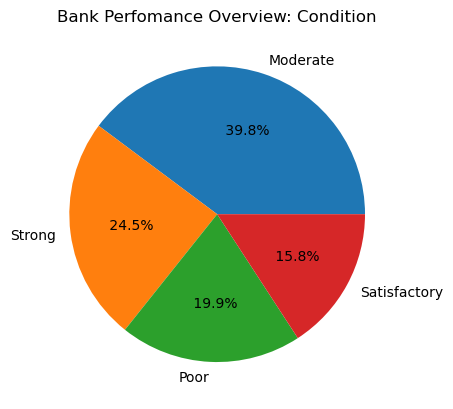

In [7]:
temp = df['condition'].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='% 1.1f%%')
plt.title('Bank Perfomance Overview: Condition')

In [8]:
#Null Values Checking
df.isnull().sum()

bank                                      0
period                                    0
totalassets                               0
totalcapital                              0
averagedeposit                            0
marketshareofassets                       0
marketshareofcapital                      0
marketshareofdeposits                     0
cashtototalassets                         0
netLoanstototalassets                     0
liquidassetstototalassets                 0
liquidassetstodemanddeposits              0
netloanstodeposits                        0
grossloanstodeposits                      0
depositstototal.liabilitiesandcapital     0
leverageratio                             0
capitaltorwa                              0
tier1capitaltorwa                         0
rwatototalassets                          0
nplstogrossloans                          0
roa                                       0
roe                                       0
netprofit                       

In [45]:
df['bank'].unique()

array(['AGRIBANK', 'BANC ABC', 'BARCLAYS', 'CBZ', 'ECOBANK', 'FBC',
       'MBCA', 'METBANK', 'NMB', 'STANBIC', 'STANCHART', 'STEWARD BANK',
       'ZB BANK', 'CABS', 'CBZ BS', 'FBC BS', 'NBS BS', 'ZB BS', 'POSB',
       'ABC BANK', 'IBC', 'INTERFIN', 'KINGDOM', 'METROPOLITAN',
       'TN BANK', 'TRUST', 'ZABG', 'RENAISSANCE', 'TETRAD', 'AFRASIA',
       'ALLIED BANK', 'ROYAL', 'GENESIS', 'PREMIER', 'ZB', 'NBS'],
      dtype=object)

In [9]:
df=df.dropna()

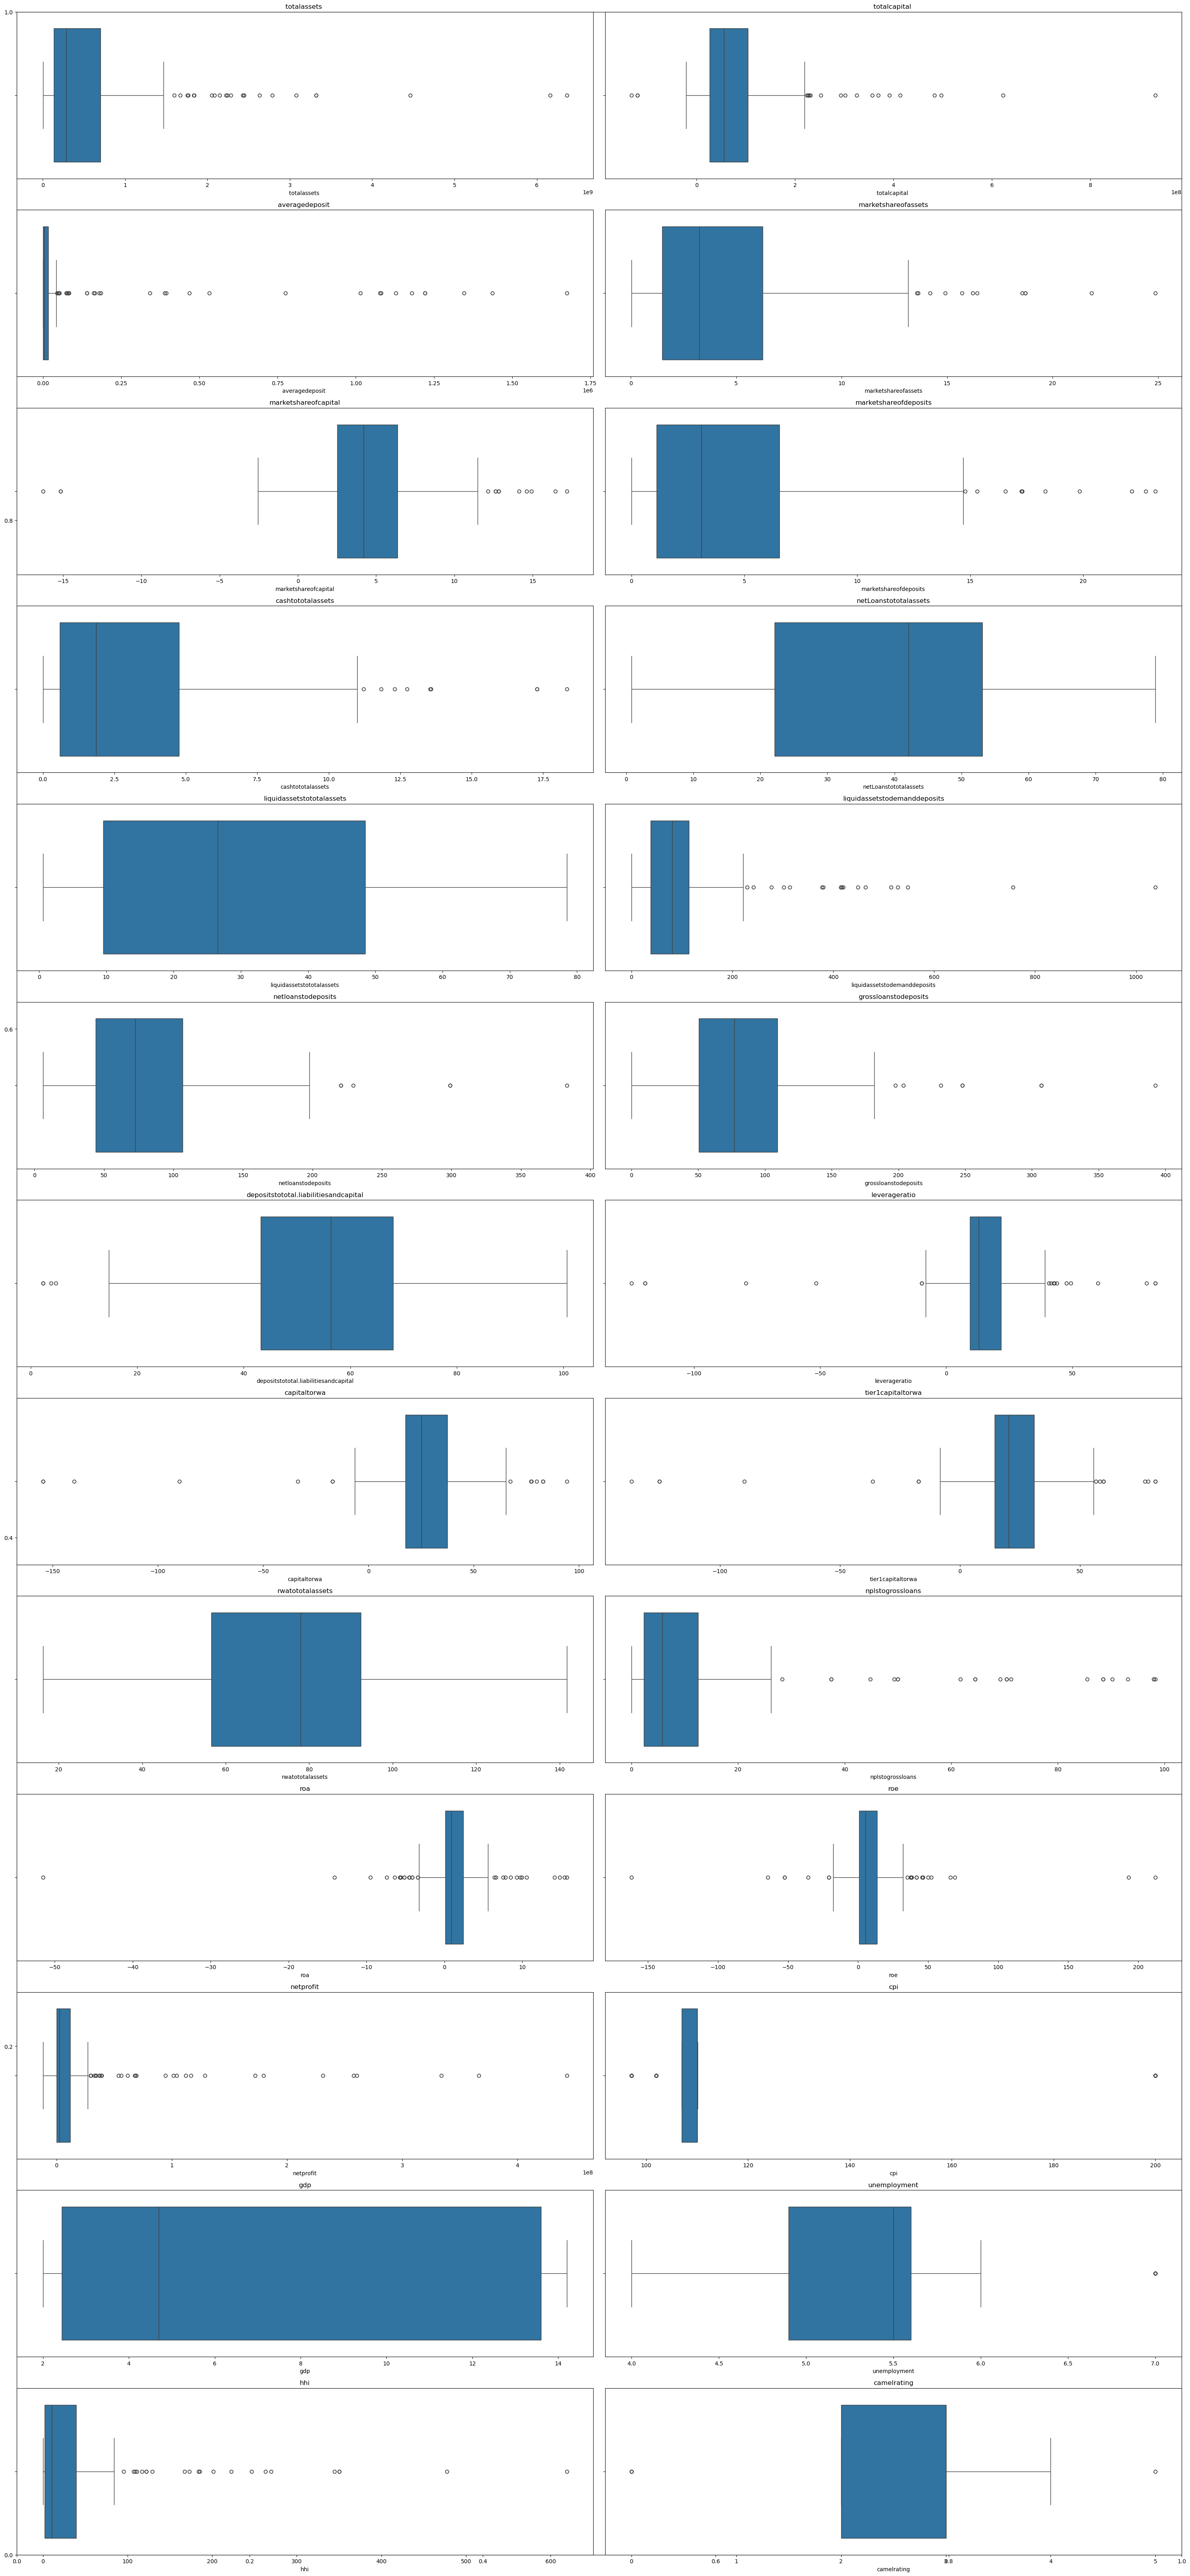

In [10]:
#Checking Outliers Using BoxPlot Method
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
# Determine number of subplots
num_cols = 2  # Set the number of columns for subplots
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

# Create boxplots for the numeric columns
plt.subplots(figsize=(30, num_rows * 5)) 
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create the subplot
    sb.boxplot(x=df[col])
    plt.title(col)  # Title for each subplot
    plt.xlabel(col)  # Label for the x-axis

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [11]:
df.isnull().sum()

bank                                     0
period                                   0
totalassets                              0
totalcapital                             0
averagedeposit                           0
marketshareofassets                      0
marketshareofcapital                     0
marketshareofdeposits                    0
cashtototalassets                        0
netLoanstototalassets                    0
liquidassetstototalassets                0
liquidassetstodemanddeposits             0
netloanstodeposits                       0
grossloanstodeposits                     0
depositstototal.liabilitiesandcapital    0
leverageratio                            0
capitaltorwa                             0
tier1capitaltorwa                        0
rwatototalassets                         0
nplstogrossloans                         0
roa                                      0
roe                                      0
netprofit                                0
cpi        

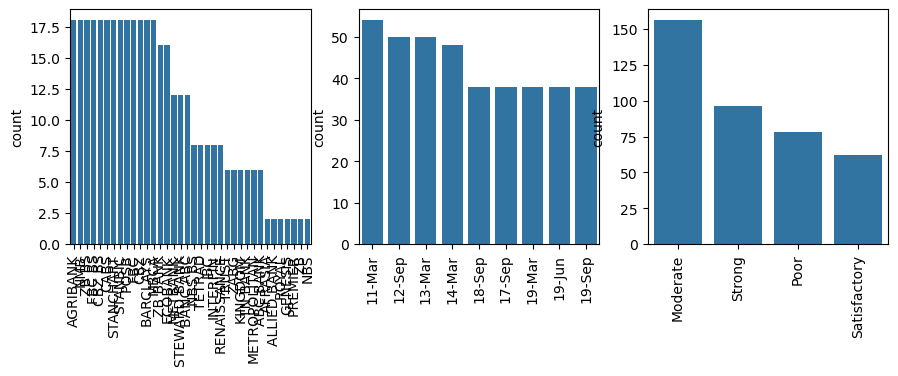

In [12]:
#Object columns

obj = (df.dtypes=='object')
objCols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1

for col in objCols:
    y = df[col].value_counts()
    plt.subplot(10,5,index)
    plt.xticks(rotation=90)
    sb.barplot(x=list(y.index), y=y)
    index+=1

In [13]:
df.columns = df.columns.str.strip()

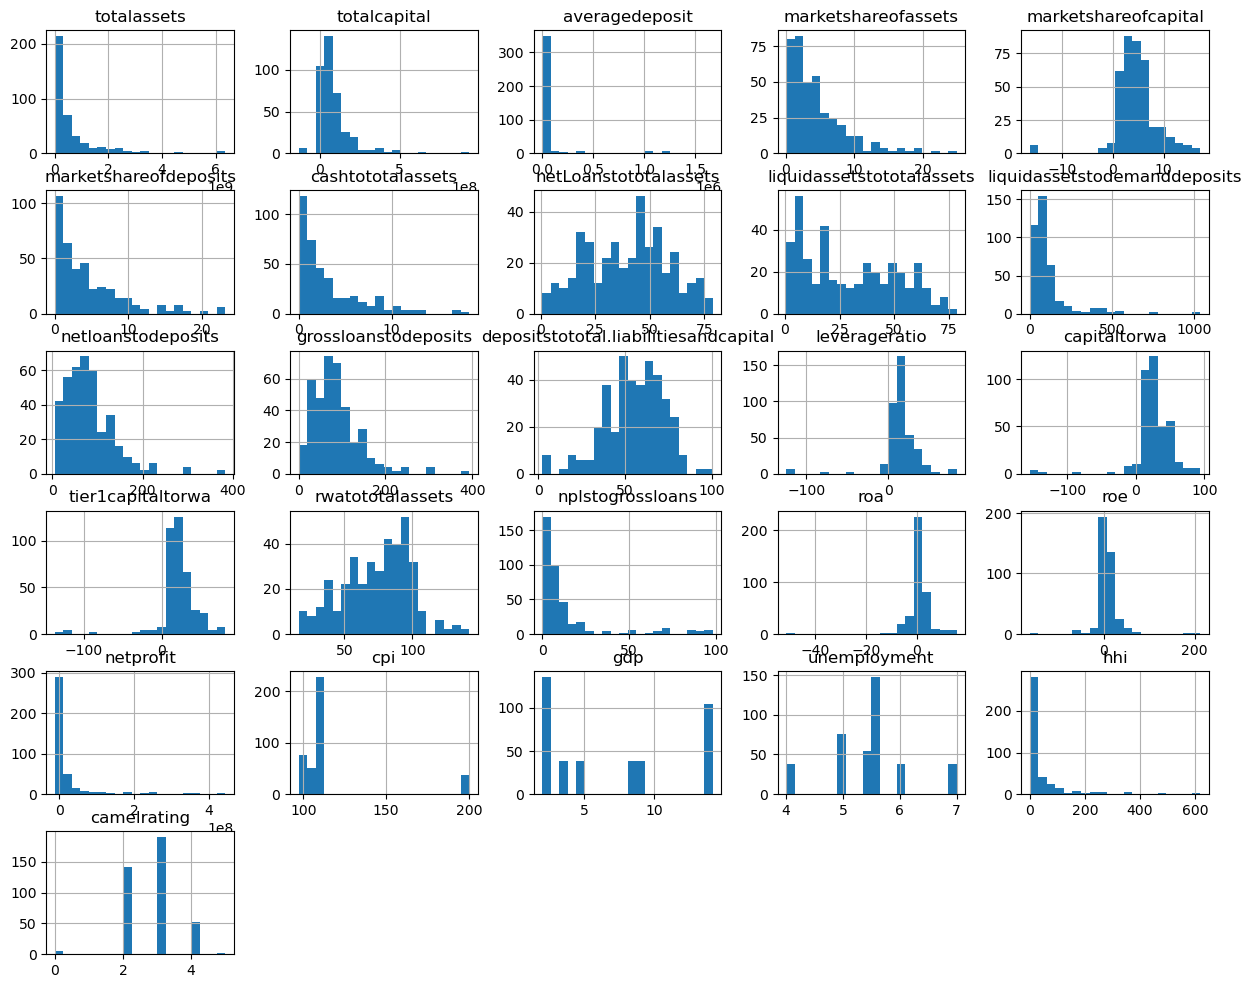

In [14]:
df.hist(bins=20, figsize=(15,12))
plt.show()

Text(0.5, 1.0, 'Checking Data Imbalance')

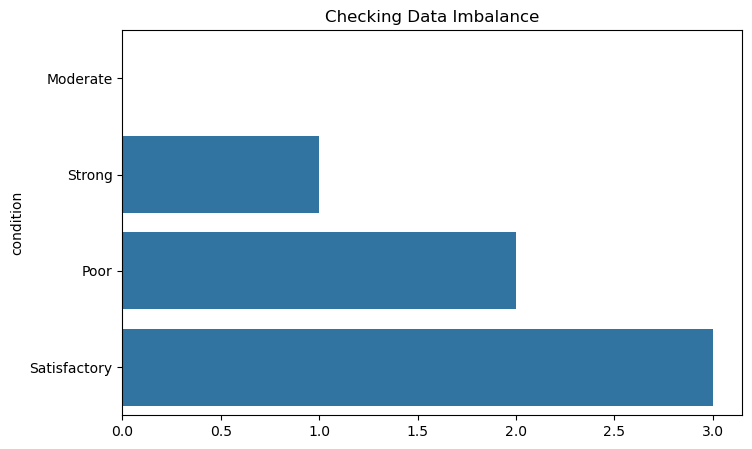

In [15]:
plt.figure(figsize=(8,5))
sb.barplot(df['condition'].value_counts().index)
plt.title('Checking Data Imbalance')

In [16]:

X = df.drop(['bank', 'period', 'condition'], axis=1)
Y = df['condition']

In [46]:
from sklearn.preprocessing import LabelEncoder
#Encode Y
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)
Y.unique()

array(['Satisfactory', 'Strong', 'Moderate', 'Poor'], dtype=object)

In [18]:

#Split Data Into Training and testing Sets
X_train, X_test, y_train, y_test = train_test_split(X,Y_encoded, 
                                                    test_size=0.2,
                                                    random_state=42)

In [48]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

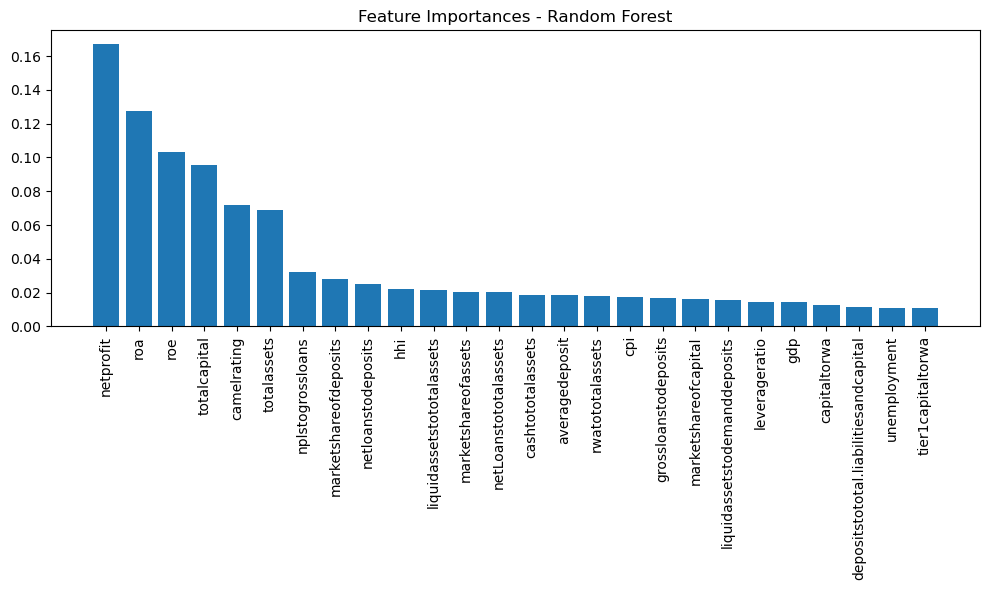

In [52]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances
importances = model.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort features by importance
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [20]:
'''MODEL SELECTION AND TRAINING
1. LogisticRegression,
RandomForest, 
XGBoost, 
SVM, 
KNN, 
MPLClassification
'''

#IMPORT MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, confusion_matrix

models = {
     'Logistic Regression':LogisticRegression(),
    'Support Vector M':SVC(probability=True),
    'Random Forest':RandomForestClassifier(random_state=0,
max_depth=5,
min_samples_split=5,
max_features=0.8,
max_samples=0.8),
    'Linear Discriminant':LinearDiscriminantAnalysis(),
    'XGBClassifier':XGBClassifier(),
    'Nearest Neighbor':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier()
}

results={}
confusionmat={}
for modName, model in models.items():
    
    #Fit the model
    model.fit(X_train_scaled, y_train)
   
    #Make Predictions
    y_pred=model.predict(X_test_scaled)

    #Evaluation Metrics for each
    results[modName] = {
        
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred,average='macro'),
        'Kappa':cohen_kappa_score(y_test, y_pred),
        # 'cr': classification_report(y_test, y_pred)
    }
    confusionmat[modName]=confusion_matrix(y_test, y_pred)
    
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,Kappa
Logistic Regression,0.759494,0.776116,0.744737,0.661174
Support Vector M,0.797468,0.831733,0.770222,0.714286
Random Forest,0.936709,0.940889,0.934101,0.912533
Linear Discriminant,0.696203,0.726687,0.653344,0.568404
XGBClassifier,0.974684,0.972222,0.973684,0.965152
Nearest Neighbor,0.797468,0.851376,0.755874,0.710887
Decision Tree,0.924051,0.924577,0.940351,0.896053


<Axes: >

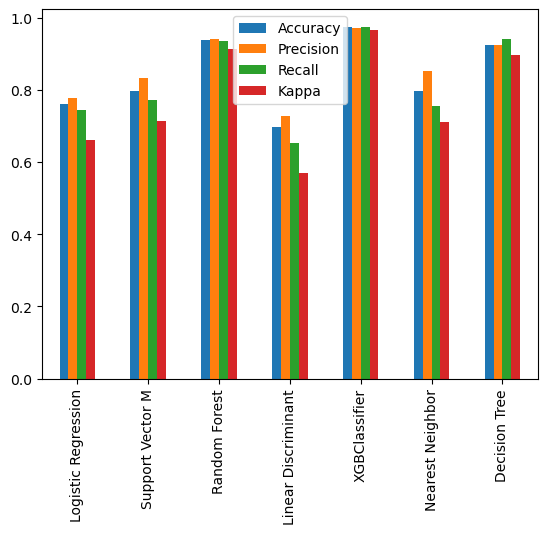

In [21]:
results_df.plot(kind='bar')

In [22]:
#MODEL EVELUATION
from sklearn.metrics import confusion_matrix, classification_report
# 1. Random Forest
model=RandomForestClassifier()
    #Fit the model
model.fit(X_train_scaled, y_train)
   
    #Make Predictions
y_pred=model.predict(X_test_scaled)

    #Inverse Transforrm
y_testl= encoder.inverse_transform(y_test)
y_predl= encoder.inverse_transform(y_pred)

labmap = [f'{i}-{label}' for i, label in enumerate(encoder.classes_)]
labmap
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True,
           fmt='d',
          xticklabels=labelmap,
          yticklabels=labelmap)
plt.title('Random Forest Confustion Matrix')

NameError: name 'labelmap' is not defined

In [ ]:
#MODEL EVELUATION
from sklearn.metrics import confusion_matrix, classification_report # type: ignore
# 1. Random Forest
model=XGBClassifier()
    #Fit the model
model.fit(X_train_scaled, y_train)
   
    #Make Predictions
y_pred=model.predict(X_test_scaled)

    #Inverse Transforrm
y_testl= encoder.inverse_transform(y_test)
y_predl= encoder.inverse_transform(y_pred)

labmap = [f'{i}-{label}' for i, label in enumerate(encoder.classes_)]
labmap
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True,
           fmt='d',
          xticklabels=labelmap,
          yticklabels=labelmap)
plt.title('XGBClassifier Confustion Matrix')

Text(0.5, 1.0, 'DecisionTreeClassifier Confustion Matrix')

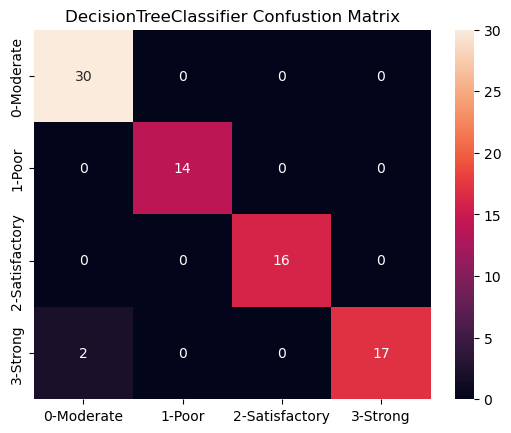

In [25]:
#MODEL EVELUATION
from sklearn.metrics import confusion_matrix, classification_report
# 1. Random Forest
model=DecisionTreeClassifier()
    #Fit the model
model.fit(X_train_scaled, y_train)
   
    #Make Predictions
y_pred=model.predict(X_test_scaled)

    #Inverse Transforrm
y_testl= encoder.inverse_transform(y_test)
y_predl= encoder.inverse_transform(y_pred)

labmap = [f'{i}-{label}' for i, label in enumerate(encoder.classes_)]
labmap
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True,
           fmt='d',
          xticklabels=labmap,
          yticklabels=labmap)
plt.title('DecisionTreeClassifier Confustion Matrix')
